# 5. 모델 평가와 성능 향상

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn
import sklearn
import scipy
import os
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg = LogisticRegression(solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
print('테스트 세트 점수" {:.3f}'.format(logreg.score(X_test, y_test)))

테스트 세트 점수" 0.920


In [3]:
# mglearn.plot_cross_validation.py

def plot_group_kfold():
    from sklearn.model_selection import GroupKFold
    groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]

    plt.figure(figsize=(10, 2))
    plt.title("GroupKFold")

    axes = plt.gca()
    axes.set_frame_on(False)
    axes.margins(0.01)

    n_folds = 12
    n_samples = 12
    n_iter = 3
    n_samples_per_fold = 1

    cv = GroupKFold(n_splits=3)
    mask = np.zeros((n_iter, n_samples))
    for i, (train, test) in enumerate(cv.split(range(12), groups=groups)):
        mask[i, train] = 1
        mask[i, test] = 2

    for i in range(n_folds):
        # test is grey
        colors = ["grey" if x == 2 else "white" for x in mask[:, i]]
        # not selected has no hatch

        boxes = axes.barh(y=range(n_iter), width=[1 - 0.1] * n_iter,
                          left=i * n_samples_per_fold, height=.6, color=colors,
                          hatch="//", edgecolor=["k"]*n_iter, align='edge')
        for j in np.where(mask[:, i] == 0)[0]:
            boxes[j].set_hatch("")

    axes.barh(y=[n_iter] * n_folds, width=[1 - 0.1] * n_folds,
              left=np.arange(n_folds) * n_samples_per_fold, height=.6,
              color="w", edgecolor=['k']*n_folds, align='edge')

    for i in range(12):
        axes.text((i + .5) * n_samples_per_fold, 3.4, "%d" %
                  groups[i], horizontalalignment="center")
    axes.invert_yaxis()
    axes.set_xlim(0, n_samples + 1)
    axes.set_ylabel("교차 검증 반복")
    axes.set_xlabel("데이터 포인트")
    axes.set_xticks(np.arange(n_samples) + .5)
    axes.set_xticklabels(np.arange(1, n_samples + 1))
    axes.set_yticks(np.arange(n_iter + 1) + .3)
    axes.set_yticklabels(["분할 %d" % x for x in range(1, n_iter + 1)] + ["그룹"]);
    plt.legend([boxes[0], boxes[1]], ["훈련 세트", "테스트 세트"], loc=(1, .3));
    plt.tight_layout()


def plot_shuffle_split():
    from sklearn.model_selection import ShuffleSplit
    plt.figure(figsize=(10, 2))
    plt.title("ShuffleSplit with 10 points"
              ", train_size=5, test_size=2, n_splits=5")

    axes = plt.gca()
    axes.set_frame_on(False)
    axes.margins(0.01)

    n_folds = 10
    n_samples = 10
    n_iter = 5
    n_samples_per_fold = 1

    ss = ShuffleSplit(n_splits=5, train_size=5, test_size=2, random_state=43)
    mask = np.zeros((n_iter, n_samples))
    for i, (train, test) in enumerate(ss.split(range(10))):
        mask[i, train] = 1
        mask[i, test] = 2

    for i in range(n_folds):
        # test is grey
        colors = ["grey" if x == 2 else "white" for x in mask[:, i]]
        # not selected has no hatch

        boxes = axes.barh(y=range(n_iter), width=[1 - 0.1] * n_iter,
                          left=i * n_samples_per_fold, height=.6, color=colors,
                          hatch="//", edgecolor=['k']*n_iter, align='edge')
        for j in np.where(mask[:, i] == 0)[0]:
            boxes[j].set_hatch("")

    axes.invert_yaxis()
    axes.set_xlim(0, n_samples + 1)
    axes.set_ylabel("교차 검증 반복")
    axes.set_xlabel("데이터 포인트")
    axes.set_xticks(np.arange(n_samples) + .5)
    axes.set_xticklabels(np.arange(1, n_samples + 1))
    axes.set_yticks(np.arange(n_iter) + .3)
    axes.set_yticklabels(["분할 %d" % x for x in range(1, n_iter + 1)]);
    # legend hacked for this random state
    plt.legend([boxes[1], boxes[0], boxes[2]], ["훈련 세트", "테스트 세트", "미선택 세트"], loc=(1, .3));
    plt.tight_layout()
    # plt.savefig("images/06_shuffle_split.png")
    # plt.close()


def plot_stratified_cross_validation():
    fig, both_axes = plt.subplots(2, 1, figsize=(12, 5))
    # plt.title("cross_validation_not_stratified")
    axes = both_axes[0]
    axes.set_title("순서대로 나열된 레이블에 적용한 기본 교차 검증")

    axes.set_frame_on(False)
    axes.margins(0.01)

    n_folds = 3
    n_samples = 150

    n_samples_per_fold = n_samples / float(n_folds)

    for i in range(n_folds):
        colors = ["w"] * n_folds
        colors[i] = "grey"
        axes.barh(y=range(n_folds), width=[n_samples_per_fold - 1] *
                  n_folds, left=i * n_samples_per_fold, height=.6,
                  color=colors, hatch="//", edgecolor=['k']*n_folds, align='edge')

    axes.barh(y=[n_folds] * n_folds, width=[n_samples_per_fold - 1] *
              n_folds, left=np.arange(3) * n_samples_per_fold, height=.6,
              color="w", edgecolor=['k']*n_folds, align='edge')

    axes.invert_yaxis()
    axes.set_xlim(0, n_samples + 1)
    axes.set_ylabel("교차 검증 반복")
    axes.set_xlabel("데이터 포인트")
    axes.set_xticks(np.arange(n_samples_per_fold / 2., n_samples, n_samples_per_fold))
    axes.set_xticklabels(["폴드 %d" % x for x in range(1, n_folds + 1)])
    axes.set_yticks(np.arange(n_folds + 1) + .3)
    axes.set_yticklabels(["분할 %d" % x for x in range(1, n_folds + 1)] + ["클래스 레이블"])
    for i in range(3):
        axes.text((i + .5) * n_samples_per_fold, 3.4, "클래스 %d" % i, horizontalalignment="center")

    ax = both_axes[1]
    ax.set_title("계층별 교차 검증")
    ax.set_frame_on(False)
    ax.invert_yaxis()
    ax.set_xlim(0, n_samples + 1)
    ax.set_ylabel("교차 검증 반복")
    ax.set_xlabel("데이터 포인트")

    ax.set_yticks(np.arange(n_folds + 1) + .3)
    ax.set_yticklabels(["분할 %d" % x for x in range(1, n_folds + 1)] + ["클래스 레이블"]);

    n_subsplit = n_samples_per_fold / 3.
    for i in range(n_folds):
        test_bars = ax.barh(
            y=[i] * n_folds, width=[n_subsplit - 1] * n_folds,
            left=np.arange(n_folds) * n_samples_per_fold + i * n_subsplit,
            height=.6, color="grey", hatch="//", edgecolor=['k']*n_folds, align='edge')

    w = 2 * n_subsplit - 1
    ax.barh(y=[0] * n_folds, width=[w] * n_folds, left=np.arange(n_folds)
            * n_samples_per_fold + (0 + 1) * n_subsplit, height=.6, color="w",
            hatch="//", edgecolor=['k']*n_folds, align='edge')
    ax.barh(y=[1] * (n_folds + 1), width=[w / 2., w, w, w / 2.],
            left=np.maximum(0, np.arange(n_folds + 1) * n_samples_per_fold -
                            n_subsplit), height=.6, color="w", hatch="//",
            edgecolor=['k']*n_folds, align='edge')
    training_bars = ax.barh(y=[2] * n_folds, width=[w] * n_folds,
                            left=np.arange(n_folds) * n_samples_per_fold,
                            height=.6, color="w", hatch="//", edgecolor=['k']*n_folds, align='edge')

    ax.barh(y=[n_folds] * n_folds, width=[n_samples_per_fold - 1] *
            n_folds, left=np.arange(n_folds) * n_samples_per_fold, height=.6,
            color="w", edgecolor=['k']*n_folds, align='edge')

    for i in range(3):
        ax.text((i + .5) * n_samples_per_fold, 3.4, "클래스 %d" % i, horizontalalignment="center")
    # ax.set_ylim(4, -0.1)
    ax.margins(0.01)
    plt.legend([training_bars[0], test_bars[0]], ['훈련 데이터', '테스트 데이터'], loc=(1.05, 1), frameon=False);

    fig.tight_layout()


def plot_cross_validation():
    plt.figure(figsize=(12, 2))
    plt.margins(0.01)
    axes = plt.gca()
    axes.set_frame_on(False)

    n_folds = 5
    n_samples = 25

    n_samples_per_fold = n_samples / float(n_folds)

    for i in range(n_folds):
        colors = ["w"] * n_folds
        colors[i] = "grey"
        bars = plt.barh(
            y=range(n_folds), width=[n_samples_per_fold - 0.1] * n_folds,
            left=i * n_samples_per_fold, height=.6, color=colors, hatch="//",
            edgecolor=['k']*n_folds, align='edge')
    axes.invert_yaxis()
    axes.set_xlim(0, n_samples + 1)
    plt.ylabel("교차 검증 반복")
    plt.xlabel("데이터 포인트")
    plt.xticks(np.arange(n_samples_per_fold / 2., n_samples, n_samples_per_fold), ["폴드 %d" % x for x in range(1, n_folds + 1)])
    plt.yticks(np.arange(n_folds) + .3, ["분할 %d" % x for x in range(1, n_folds + 1)])
    plt.legend([bars[0], bars[4]], ['훈련 데이터', '테스트 데이터'], loc=(1.05, 0.4), frameon=False);


def plot_threefold_split():
    plt.figure(figsize=(15, 1))
    axis = plt.gca()
    axis.margins(0.01)
    bars = axis.barh([0, 0, 0], [11.9, 2.9, 4.9], left=[0, 12, 15], color=[
                     'white', 'grey', 'grey'], hatch="//", edgecolor='k', align='edge')
    bars[2].set_hatch(r"")
    axis.set_yticks(())
    axis.set_frame_on(False)
    # axis.set_ylim(-.1, .8)
    # axis.set_xlim(-0.1, 20.1)
    axis.set_xticks([6, 13.3, 17.5])
    axis.set_xticklabels(["훈련 세트", "검증 세트", "테스트 세트"], fontdict={'fontsize': 20});
    axis.tick_params(length=0, labeltop=True, labelbottom=False)
    axis.text(6, -.3, "모델 훈련", fontdict={'fontsize': 13}, horizontalalignment="center")
    axis.text(13.3, -.3, "매개변수 선택", fontdict={'fontsize': 13}, horizontalalignment="center")
    axis.text(17.5, -.3, "모델 평가", fontdict={'fontsize': 13}, horizontalalignment="center")

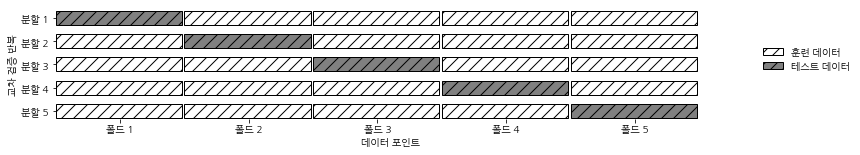

In [4]:
# mglearn.plots.plot_cross_validation()     # plt.barh() y 매개변수 오류

plot_cross_validation()

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000)

scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print('교차 검증 점수: {}'.format(scores))
print('교차 검증 평균: {:.3f}'.format(scores.mean()))

교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]
교차 검증 평균: 0.973


In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
print('IRIS 레이블: {}'.format(iris.target))

IRIS 레이블: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


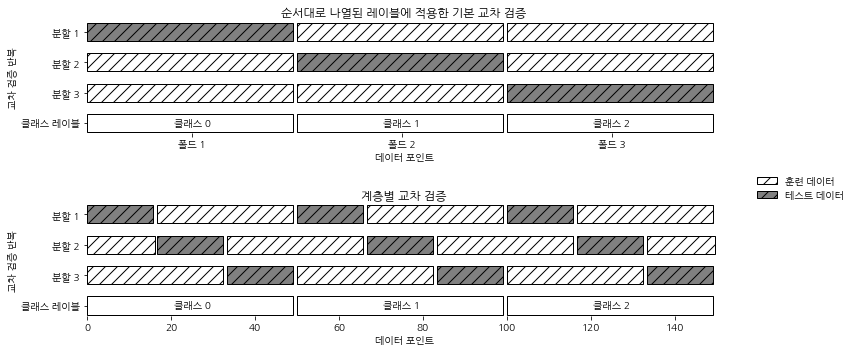

In [7]:
# mglearn.plots.plot_stratified_cross_validation()       # plt.barh() y 매개변수 오류


plot_stratified_cross_validation()

In [8]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

print('교차 검증 점수: {}'.format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))
print('교차 검증 평균: {:.3f}'.format(cross_val_score(logreg, iris.data, iris.target, cv=kfold).mean()))

교차 검증 점수: [1.         1.         0.86666667 0.93333333 0.83333333]
교차 검증 평균: 0.927


In [9]:
kfold = KFold(n_splits=3)
print('교차 검증 점수: {}'.format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

교차 검증 점수: [0. 0. 0.]


In [10]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print('교차 검증 점수: {}'.format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

교차 검증 점수: [0.98 0.96 0.96]


In [11]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)

print('교차 검증 분할 회수: ', len(scores))
print('교차 검증 평균 정확도: {:.3f}'.format(scores.mean()))

교차 검증 분할 회수:  150
교차 검증 평균 정확도: 0.967


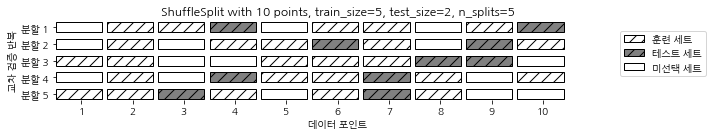

In [12]:
# mglearn.plots.plot_shuffle_split()       # plt.barh() y 매개변수 오류

plot_shuffle_split()

In [13]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print('교차 검증 점수: {}'.format(scores))

교차 검증 점수: [0.98666667 1.         0.98666667 0.94666667 0.96       0.92
 0.93333333 0.98666667 0.98666667 0.96      ]


In [14]:
from sklearn.model_selection import GroupKFold
X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print('교차 검증 점수: {}'.format(scores))

교차 검증 점수: [0.75       0.6        0.66666667]


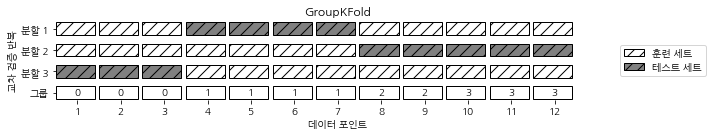

In [15]:
# mglearn.plots.plot_group_kfold()       # plt.barh() y 매개변수 오류
plot_group_kfold()

In [16]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print('훈련 세트의 크기: {},  테스트 세트의 크기: {}'.format(X_train.shape[0], X_test.shape[0]))

best_score = 0
best_parameters = {}

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'gamma': gamma, 'C': C}
        
print('최고 점수: {:.3f}'.format(best_score))
print('최적 매개변수: {}'.format(best_parameters))

훈련 세트의 크기: 112,  테스트 세트의 크기: 38
최고 점수: 0.974
최적 매개변수: {'gamma': 0.001, 'C': 100}


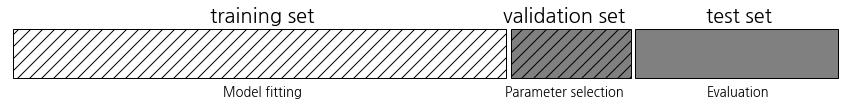

In [17]:
mglearn.plots.plot_threefold_split()

In [18]:
from sklearn.svm import SVC
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print('훈련 세트의 크기: {},  검증 세트의 크기: {},  테스트 세트의 크기: {}'.format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'gamma': gamma, 'C': C}
            
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print('검증 세트에서의 최고 점수: {:.2f}'.format(best_score))
print('최적 매개변수: {}'.format(best_parameters))
print('최적 매개변수의 테스트 세트 점수: {:.2f}'.format(test_score))

훈련 세트의 크기: 84,  검증 세트의 크기: 28,  테스트 세트의 크기: 38
검증 세트에서의 최고 점수: 0.96
최적 매개변수: {'gamma': 0.001, 'C': 10}
최적 매개변수의 테스트 세트 점수: 0.92


In [19]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'gamma': gamma, 'C': C}
            
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print('검증 세트에서의 최고 점수: {:.2f}'.format(best_score))
print('최적 매개변수: {}'.format(best_parameters))
print('최적 매개변수의 테스트 세트 점수: {:.2f}'.format(test_score))

검증 세트에서의 최고 점수: 0.97
최적 매개변수: {'gamma': 0.01, 'C': 100}
최적 매개변수의 테스트 세트 점수: 0.97


In [20]:
# mglearn.plot_grid_search.py 중 일부

from sklearn.model_selection import GridSearchCV

def plot_cross_val_selection():
    iris = load_iris()
    X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data,
                                                              iris.target,
                                                              random_state=0)

    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
    grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True, iid=True)
    grid_search.fit(X_trainval, y_trainval)
    results = pd.DataFrame(grid_search.cv_results_)[15:]

    best = np.argmax(results.mean_test_score.values)
    plt.figure(figsize=(10, 5))
    plt.xlim(-1, len(results))
    plt.ylim(0, 1.1)
    for i, (_, row) in enumerate(results.iterrows()):
        scores = row[['split%d_test_score' % i for i in range(5)]]
        marker_cv, = plt.plot([i] * 5, scores, '^', c='blue', markersize=5,
                              alpha=.5)
        marker_mean, = plt.plot(i, row.mean_test_score, 'v', c='none', alpha=1,
                              markersize=10, markeredgecolor='k')
        if i == best:
            marker_best, = plt.plot(i, row.mean_test_score, 'o', c='red',
                                    fillstyle="none", alpha=1, markersize=20,
                                    markeredgewidth=3)

    plt.xticks(range(len(results)), [str(x).strip("{}").replace("'", "") for x
                                     in grid_search.cv_results_['params']],
               rotation=90)
    plt.ylabel("정확도")
    plt.xlabel("매개변수 세팅")
    plt.legend([marker_cv, marker_mean, marker_best],
               ["교차 검증 정확도", "평균 정확도", "최적 매개변수 설정"],
               loc=(1.05, .4))
    
    return param_grid, grid_search

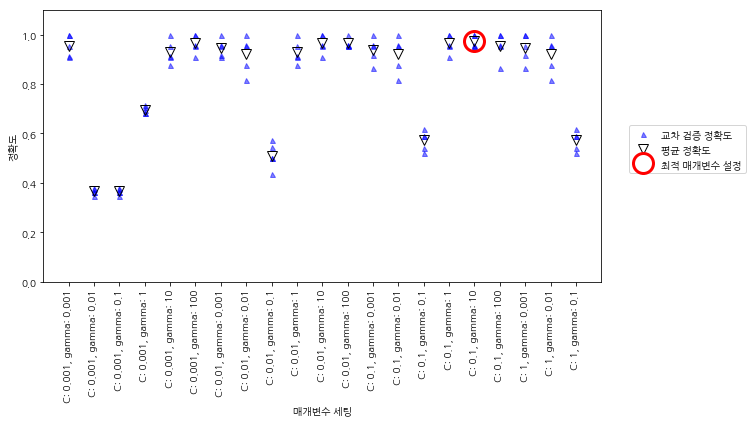

In [21]:
param_grid, grid_search = plot_cross_val_selection()

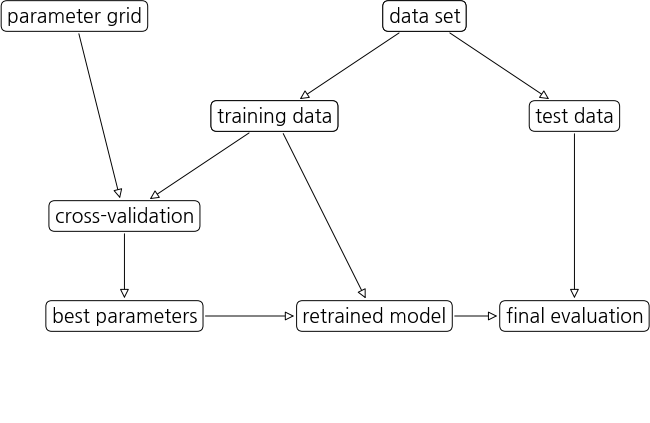

In [22]:
mglearn.plots.plot_grid_search_overview()

In [23]:
print('최적 매개변수: {}'.format(grid_search.best_params_))
print('최상의 교차검증 정확도: {:.2f}'.format(grid_search.best_score_))
print('교차검증을 사용한 그리드 서치 테스트 점수: {:.2f}'.format(grid_search.score(X_test, y_test)))

print('최공 성능 모델:\n{}'.format(grid_search.best_estimator_))

최적 매개변수: {'C': 100, 'gamma': 0.01}
최상의 교차검증 정확도: 0.97
교차검증을 사용한 그리드 서치 테스트 점수: 0.97
최공 성능 모델:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [24]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000500,0.000053,0.000220,0.000011,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
1,0.000484,0.000032,0.000218,0.000007,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
2,0.000493,0.000015,0.000224,0.000008,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
3,0.000578,0.000024,0.000291,0.000064,0.001,1,"{'C': 0.001, 'gamma': 1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
4,0.000552,0.000016,0.000251,0.000019,0.001,10,"{'C': 0.001, 'gamma': 10}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852


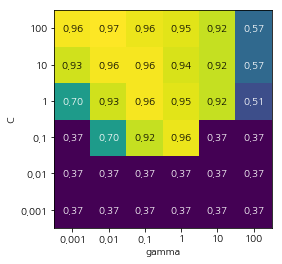

In [25]:
scores = np.array(results.mean_test_score).reshape(6,6)
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap='viridis')

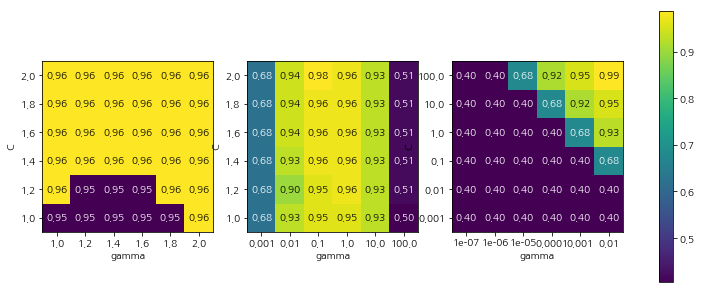

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
param_grid_linear = {'C': np.linspace(1, 2, 6), 'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6), 'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5, iid=True)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
    
    scores_image = mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                                        ylabel='C', yticklabels=param_grid['C'], cmap='viridis', ax=ax)
    
plt.colorbar(scores_image, ax=axes.tolist())

In [27]:
param_grid = [{'kernel': ['rbf'],
              'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print('그리드 목록:\n{}'.format(param_grid))

그리드 목록:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [28]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, iid=True, return_train_score=True)
grid_search.fit(X_train, y_train)
print('최적 매개변수: {}'.format(grid_search.best_params_))
print('최고 교차 검증 점수: {:.2f}'.format(grid_search.best_score_))

최적 매개변수: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
최고 교차 검증 점수: 0.99


In [29]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.000558424,0.000547886,0.000499487,0.000491476,0.000478649,0.000468636,0.000640488,0.000531006,0.000545216,0.000836372,...,0.000370789,0.000412655,0.000578022,0.000558662,0.000609303,0.000537586,0.000456095,0.000426054,0.000409365,0.000423384
std_fit_time,9.21124e-05,0.000127563,4.69022e-05,2.66204e-05,5.47775e-05,2.46431e-05,0.000129532,4.21399e-05,0.000107989,5.34256e-05,...,3.11424e-05,3.09053e-05,7.6439e-05,2.80457e-05,0.000117331,9.36339e-05,7.06629e-05,1.99424e-05,4.12749e-05,7.14674e-05
mean_score_time,0.000285339,0.000308275,0.000306177,0.000242329,0.000246477,0.000255013,0.000337505,0.000284767,0.000272226,0.000468445,...,0.000232124,0.000266409,0.000255299,0.000243568,0.000345993,0.000277853,0.000282145,0.000228167,0.000227499,0.000228739
std_score_time,2.79409e-05,5.43199e-05,6.38338e-05,1.04705e-05,1.88965e-05,4.42128e-05,7.10283e-05,1.42666e-05,4.56466e-05,6.73696e-05,...,3.72369e-05,6.75269e-05,3.28507e-05,1.75387e-05,3.97636e-05,5.97634e-05,5.28994e-05,1.62524e-05,3.59206e-05,3.74833e-05
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,...,0.944444,0.944444,0.833333,0.5,0.333333,0.944444,0.888889,1,1,0.944444
split1_test_score,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,...,0.888889,0.944444,0.833333,0.388889,0.333333,0.888889,0.944444,0.944444,0.888889,0.888889


In [30]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)
print('교차 검증 점수: {}'.format(scores))
print('교차 검증 평균 점수: {:.2f}'.format(scores.mean()))

교차 검증 점수: [0.96666667 1.         0.96666667 0.96666667 1.        ]
교차 검증 평균 점수: 0.98


In [31]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    for training_samples, test_samples in outer_cv.split(X, y):
        best_params = {}
        best_score = -np.inf
        for parameters in parameter_grid:
            cv_scores = []
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [32]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print('교차 검증 점수: {}'.format(scores))

교차 검증 점수: [0.96666667 1.         0.96666667 0.96666667 1.        ]


In [33]:
from sklearn.datasets import load_digits
digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [34]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print('예측된 유니크 레이블: {}'.format(np.unique(pred_most_frequent)))
print('테스트 점수: {:.2f}'.format(dummy_majority.score(X_test, y_test)))

예측된 유니크 레이블: [False]
테스트 점수: 0.90


In [35]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print('예측된 유니크 레이블: {}'.format(np.unique(pred_tree)))
print('테스트 점수: {:.2f}'.format(tree.score(X_test, y_test)))

예측된 유니크 레이블: [False  True]
테스트 점수: 0.92


In [36]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print('dummy 점수: {:2f}'.format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.01, solver='liblinear', max_iter=10000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print('logreg 점수: {:.2f}'.format(logreg.score(X_test, y_test)))

dummy 점수: 0.813333
logreg 점수: 0.98


In [37]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print('오차 행렬: {}'.format(confusion))

오차 행렬: [[401   2]
 [  7  40]]


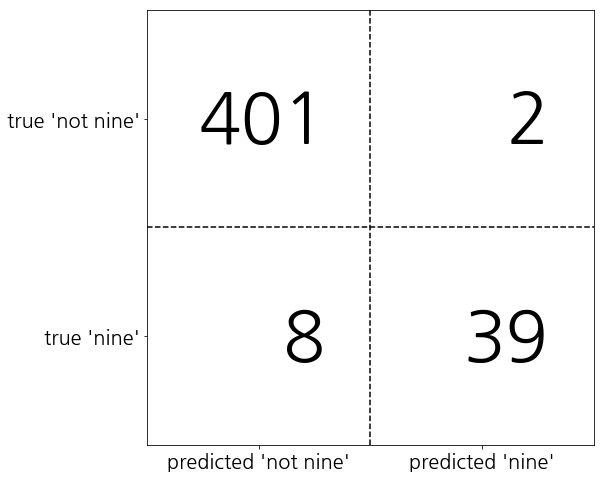

In [38]:
mglearn.plots.plot_confusion_matrix_illustration()

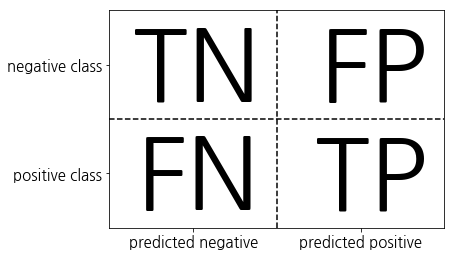

In [39]:
mglearn.plots.plot_binary_confusion_matrix()

In [40]:
print('빈도 기반 더미 모델:')
print(confusion_matrix(y_test, pred_most_frequent))
print('\n무작위 더미 모델:')
print(confusion_matrix(y_test, pred_dummy))
print('\n결정 트리:')
print(confusion_matrix(y_test, pred_tree))
print('\n로지스틱 회귀:')
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[372  31]
 [ 41   6]]

결정 트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀:
[[401   2]
 [  7  40]]


In [41]:
from sklearn.metrics import f1_score
print('빈도 기반 더미 모델의 f1_score: {:.2f}'.format(f1_score(y_test, pred_most_frequent)))   # 분모가 0이 되어 warning 메시지 출력됨
print('\n무작위 더미 모델의 f1_score: {:.2f}'.format(f1_score(y_test, pred_dummy)))
print('\n결정 트리의 f1_score: {:.2f}'.format(f1_score(y_test, pred_tree)))
print('\n로지스틱 회귀의 f1_score: {:.2f}'.format(f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1_score: 0.00

무작위 더미 모델의 f1_score: 0.14

결정 트리의 f1_score: 0.55

로지스틱 회귀의 f1_score: 0.90


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=['9 아님', '9']))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

   micro avg       0.90      0.90      0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
print(classification_report(y_test, pred_dummy, target_names=['9 아님', '9']))

              precision    recall  f1-score   support

        9 아님       0.90      0.92      0.91       403
           9       0.16      0.13      0.14        47

   micro avg       0.84      0.84      0.84       450
   macro avg       0.53      0.53      0.53       450
weighted avg       0.82      0.84      0.83       450



In [44]:
print(classification_report(y_test, pred_logreg, target_names=['9 아님', '9']))

              precision    recall  f1-score   support

        9 아님       0.98      1.00      0.99       403
           9       0.95      0.85      0.90        47

   micro avg       0.98      0.98      0.98       450
   macro avg       0.97      0.92      0.94       450
weighted avg       0.98      0.98      0.98       450



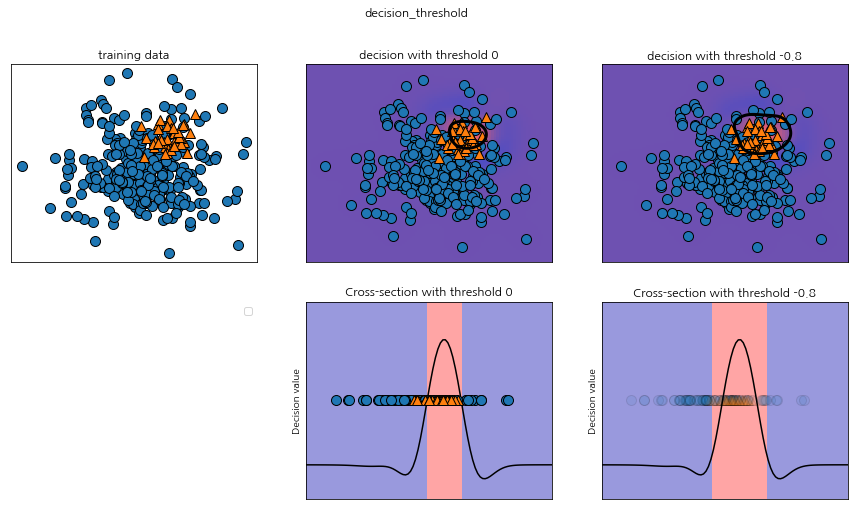

In [45]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=(400,50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.5).fit(X_train, y_train)

mglearn.plots.plot_decision_threshold()

In [46]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       104
           1       0.20      0.33      0.25         9

   micro avg       0.84      0.84      0.84       113
   macro avg       0.57      0.61      0.58       113
weighted avg       0.88      0.84      0.86       113



In [47]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [48]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89       104
           1       0.31      1.00      0.47         9

   micro avg       0.82      0.82      0.82       113
   macro avg       0.66      0.90      0.68       113
weighted avg       0.95      0.82      0.86       113



In [49]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

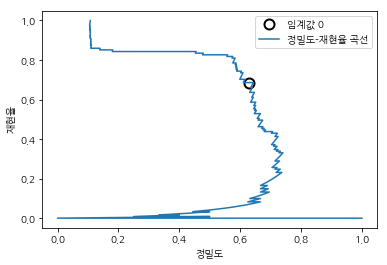

In [50]:
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.5).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='임계값 0', fillstyle='none', c='k', mew=2)
plt.plot(precision, recall, label='정밀도-재현율 곡선')
plt.xlabel('정밀도')
plt.ylabel('재현율')
plt.legend(loc='best')

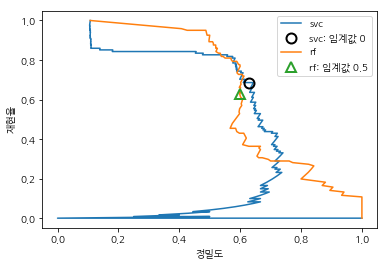

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)
precision_rf, recall_rf, threshods_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(precision, recall, label='svc')
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='svc: 임계값 0', fillstyle='none', c='k', mew=2)
plt.plot(precision_rf, recall_rf, label='rf')
close_default_rf = np.argmin(np.abs(threshods_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', markersize=10, label='rf: 임계값 0.5', fillstyle='none', mew=2)
plt.xlabel('정밀도')
plt.ylabel('재현율')
plt.legend(loc='best')

In [52]:
print('랜덤 포레스트의 f1_score: {:.3f}'.format(f1_score(y_test, rf.predict(X_test))))
print('svc의 f1_score: {:.3f}'.format(f1_score(y_test, svc.predict(X_test))))

랜덤 포레스트의 f1_score: 0.610
svc의 f1_score: 0.656


In [53]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:,1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print('랜덤 포레스트의 평균 정밀도: {:.3f}'.format(ap_rf))
print('svc의 평균 정밀도: {:.3f}'.format(ap_svc))

랜덤 포레스트의 평균 정밀도: 0.660
svc의 평균 정밀도: 0.567


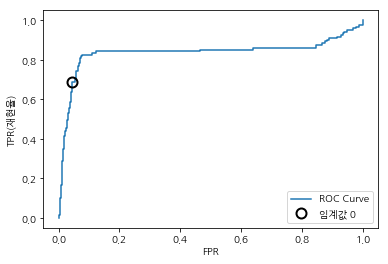

In [54]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR(재현율)')
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label='임계값 0', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

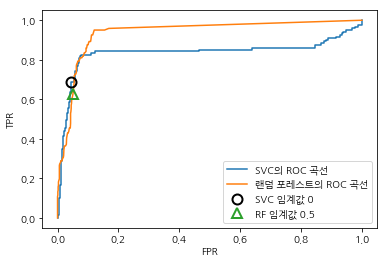

In [55]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='SVC의 ROC 곡선')
plt.plot(fpr_rf, tpr_rf, label='랜덤 포레스트의 ROC 곡선')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label='SVC 임계값 0', fillstyle='none', c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10, label='RF 임계값 0.5', fillstyle='none', mew=2)
plt.legend(loc=4)

In [56]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print('랜덤 포레스트의 AUC: {:.3f}'.format(rf_auc))
print('SVC의 AUC: {:.3f}'.format(svc_auc))

랜덤 포레스트의 AUC: 0.937
SVC의 AUC: 0.836


gamma = 1.0000, 정확도 = 0.8956, AUC = 0.5000
gamma = 0.1000, 정확도 = 0.8956, AUC = 0.9582
gamma = 0.0100, 정확도 = 0.8956, AUC = 0.9995


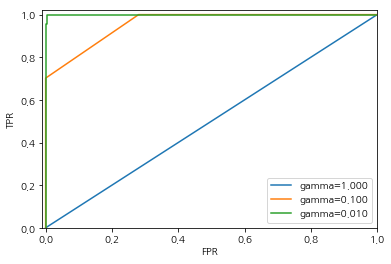

In [57]:
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)
plt.figure()

for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print('gamma = {:.4f}, 정확도 = {:.4f}, AUC = {:.4f}'.format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label='gamma={:.3f}'.format(gamma))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc='best')

In [58]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
lr = LogisticRegression(solver='liblinear', multi_class='auto').fit(X_train, y_train)
pred = lr.predict(X_test)
print('정확도" {:.3f}'.format(accuracy_score(y_test, pred)))
print('오차 행렬:\n{}'.format(confusion_matrix(y_test, pred)))

정확도" 0.953
오차 행렬:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


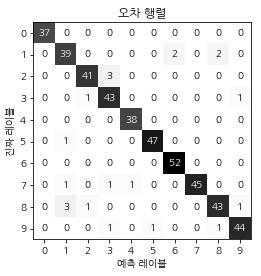

In [59]:
score_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), xlabel='예측 레이블', ylabel='진짜 레이블', xticklabels=digits.target_names,
                                   yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt='%d')
plt.title('오차 행렬')
plt.gca().invert_yaxis()

In [60]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

   micro avg       0.95      0.95      0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [61]:
print('micro 평균 f1 점수: {:.3f}'.format(f1_score(y_test, pred, average='micro')))
print('macro 평균 f1 점수: {:.3f}'.format(f1_score(y_test, pred, average='macro')))

micro 평균 f1 점수: 0.953
macro 평균 f1 점수: 0.954


In [62]:
print('기본 평가지표: {}'.format(cross_val_score(SVC(gamma='auto'), digits.data, digits.target == 9, cv=5)))
explicit_accuracy = cross_val_score(SVC(gamma='auto'), digits.data, digits.target == 9, scoring='accuracy', cv=5)
print('정확도 지표: {}'.format(explicit_accuracy))
roc_auc = cross_val_score(SVC(gamma='auto'), digits.data, digits.target == 9, cv=5, scoring='roc_auc')
print('AUC 지표: {}'.format(roc_auc))

기본 평가지표: [0.9        0.9        0.89972145 0.89972145 0.89972145]
정확도 지표: [0.9        0.9        0.89972145 0.89972145 0.89972145]
AUC 지표: [0.99674211 0.99725652 0.99552804 0.99836601 0.99165807]


In [63]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state=0)
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(SVC(gamma='auto'), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print('**정확도 지표를 사용한 그리드 서치**')
print('최적의 매개변수: ', grid.best_params_)
print('최상의 교차 검증 점수(정확도): {:.3f}'.format(grid.best_score_))
print('테스트 세트 AUC: {:.3f}'.format(roc_auc_score(y_test, grid.decision_function(X_test))))
print('테스트 세트 정확도: {:.3f}s'.format(grid.score(X_test, y_test)))

**정확도 지표를 사용한 그리드 서치**
최적의 매개변수:  {'gamma': 0.0001}
최상의 교차 검증 점수(정확도): 0.976
테스트 세트 AUC: 0.992
테스트 세트 정확도: 0.973s


In [64]:
grid = GridSearchCV(SVC(gamma='auto'), param_grid=param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)
print('**AUC 지표를 사용한 그리드 서치**')
print('최적의 매개변수: ', grid.best_params_)
print('최상의 교차 검증 점수(AUC): {:.3f}'.format(grid.best_score_))
print('테스트 세트 AUC: {:.3f}'.format(roc_auc_score(y_test, grid.decision_function(X_test))))
print('테스트 세트 정확도: {:.3f}s'.format(grid.score(X_test, y_test)))

**AUC 지표를 사용한 그리드 서치**
최적의 매개변수:  {'gamma': 0.01}
최상의 교차 검증 점수(AUC): 0.998
테스트 세트 AUC: 1.000
테스트 세트 정확도: 1.000s


In [65]:
from sklearn.metrics.scorer import SCORERS
print('가능한 평가 방식:\n{}'.format(SCORERS.keys()))

가능한 평가 방식:
dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])
